# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['name']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsiombe
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | opuwo
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | antalaha
Processing Record 7 of Set 1 | severo-yeniseyskiy
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | harper
Processing Record 10 of Set 1 | telhara
Processing Record 11 of Set 1 | selkirk
Processing Record 12 of Set 1 | kasungu
Processing Record 13 of Set 1 | pudasjarvi
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | kayangel
Processing Record 18 of Set 1 | mata-utu
Processing Record 19 of Set 1 | korhogo
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | west island
Processing Record 22 o

Processing Record 43 of Set 4 | puerto lempira
Processing Record 44 of Set 4 | queenstown
Processing Record 45 of Set 4 | porto novo
Processing Record 46 of Set 4 | udachny
Processing Record 47 of Set 4 | greater sudbury
Processing Record 48 of Set 4 | haiku-pauwela
Processing Record 49 of Set 4 | jamestown
Processing Record 0 of Set 5 | cockburn town
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | jacksonville
Processing Record 3 of Set 5 | guozhen
Processing Record 4 of Set 5 | sabang
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 5 | seabra
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | constantia
Processing Record 10 of Set 5 | utrik
Processing Record 11 of Set 5 | matthew town
Processing Record 12 of Set 5 | briare
Processing Record 13 of Set 5 | qianzhou
Processing Record 14 of Set 5 | mouila
Processing Record 15 of Set 5 | mizdah
Processing Re

Processing Record 36 of Set 8 | santa cruz de yojoa
Processing Record 37 of Set 8 | tiznit
Processing Record 38 of Set 8 | xinzhi
Processing Record 39 of Set 8 | toga village
City not found. Skipping...
Processing Record 40 of Set 8 | bogale
Processing Record 41 of Set 8 | strezhevoy
Processing Record 42 of Set 8 | mthatha
Processing Record 43 of Set 8 | kolyvan'
Processing Record 44 of Set 8 | port victoria
Processing Record 45 of Set 8 | mugia
Processing Record 46 of Set 8 | kodinsk
Processing Record 47 of Set 8 | tvoroyri
Processing Record 48 of Set 8 | iskushuban
Processing Record 49 of Set 8 | happy valley-goose bay
Processing Record 0 of Set 9 | keflavik
Processing Record 1 of Set 9 | dunedin
Processing Record 2 of Set 9 | lusambo
Processing Record 3 of Set 9 | andkhoy
Processing Record 4 of Set 9 | callao
Processing Record 5 of Set 9 | conception bay south
Processing Record 6 of Set 9 | ashburton
Processing Record 7 of Set 9 | zhangjiakou shi xuanhua qu
Processing Record 8 of Se

Processing Record 21 of Set 12 | oytal
Processing Record 22 of Set 12 | cabo san lucas
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | comodoro rivadavia
Processing Record 25 of Set 12 | rio san juan
Processing Record 26 of Set 12 | crookston
Processing Record 27 of Set 12 | ar rass
Processing Record 28 of Set 12 | jose mariano jimenez
City not found. Skipping...
Processing Record 29 of Set 12 | veraval
Processing Record 30 of Set 12 | fort mcmurray
Processing Record 31 of Set 12 | mount isa
Processing Record 32 of Set 12 | dampit
Processing Record 33 of Set 12 | jiayuguan
Processing Record 34 of Set 12 | jindabyne
Processing Record 35 of Set 12 | james city
Processing Record 36 of Set 12 | westport
Processing Record 37 of Set 12 | bequimao
Processing Record 38 of Set 12 | albertina
Processing Record 39 of Set 12 | camayenne
Processing Record 40 of Set 12 | yasnyy
Processing Record 41 of Set 12 | broome
Processing Record 42 of Set 12 | kununurra
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,293.44,96,4,2.80,Tsiombe,1686078027
1,port alfred,-33.5906,26.8910,290.74,41,0,3.27,Port Alfred,1686078027
2,opuwo,-18.0607,13.8400,291.86,27,0,1.92,Opuwo,1686078027
3,edinburgh of the seven seas,-37.0676,-12.3116,285.95,66,97,8.73,Edinburgh of the Seven Seas,1686078027
4,antalaha,-14.9003,50.2788,295.92,86,0,3.31,Antalaha,1686078028


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/rafed.mahbub/Documents/MyDoc/MyDoc/UBHM/Python-api/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/rafed.mahbub/Documents/MyDoc/MyDoc/UBHM/Python-api/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,293.44,96,4,2.80,Tsiombe,1686078027
1,port alfred,-33.5906,26.8910,290.74,41,0,3.27,Port Alfred,1686078027
2,opuwo,-18.0607,13.8400,291.86,27,0,1.92,Opuwo,1686078027
3,edinburgh of the seven seas,-37.0676,-12.3116,285.95,66,97,8.73,Edinburgh of the Seven Seas,1686078027
4,antalaha,-14.9003,50.2788,295.92,86,0,3.31,Antalaha,1686078028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

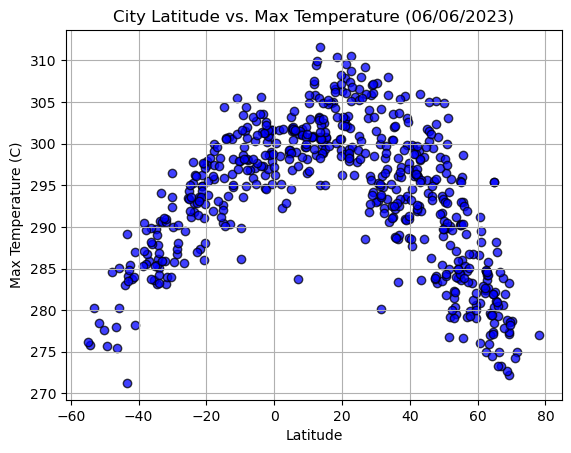

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", c = "b", edgecolors = "black", alpha =0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (06/06/2023)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/rafed.mahbub/Documents/MyDoc/MyDoc/UBHM/Python-api/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

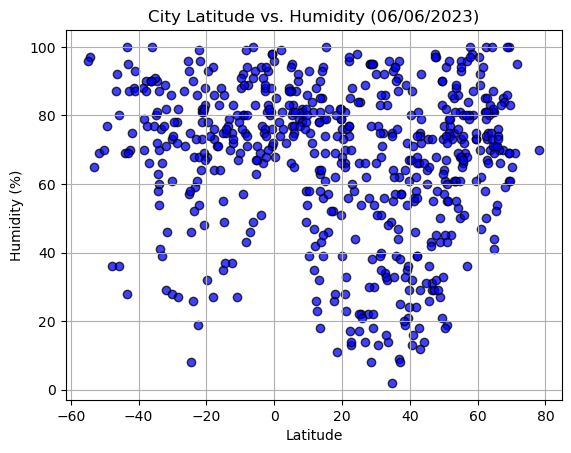

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", c = "b", edgecolors = "black", alpha =0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (06/06/2023)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/rafed.mahbub/Documents/MyDoc/MyDoc/UBHM/Python-api/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

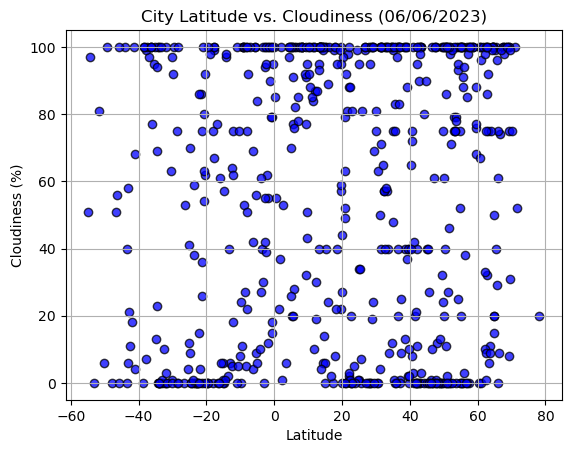

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", c = "b", edgecolors = "black", alpha =0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (06/06/2023)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/rafed.mahbub/Documents/MyDoc/MyDoc/UBHM/Python-api/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

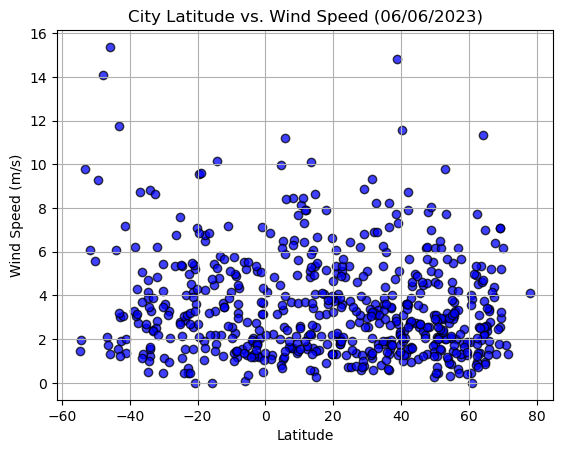

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", c = "b", edgecolors = "black", alpha =0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (06/06/2023)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/rafed.mahbub/Documents/MyDoc/MyDoc/UBHM/Python-api/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(6,4))
    plt.scatter(x_values, y_values, c= "b", edgecolor="black", linewidth=1, marker="o", alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 12)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,severo-yeniseyskiy,60.3725,93.0408,286.67,97,0,1.85,Severo-Yeniseyskiy,1686078028
7,harper,4.3750,-7.7169,298.88,88,100,4.48,Harper,1686078028
8,telhara,21.0269,76.8389,307.88,28,79,5.03,Telhāra,1686078029
9,selkirk,50.1436,-96.8845,304.88,57,61,1.79,Selkirk,1686077770
11,pudasjarvi,65.3833,26.9167,281.08,71,100,2.60,Pudasjärvi,1686078029


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,293.44,96,4,2.80,Tsiombe,1686078027
1,port alfred,-33.5906,26.8910,290.74,41,0,3.27,Port Alfred,1686078027
2,opuwo,-18.0607,13.8400,291.86,27,0,1.92,Opuwo,1686078027
3,edinburgh of the seven seas,-37.0676,-12.3116,285.95,66,97,8.73,Edinburgh of the Seven Seas,1686078027
4,antalaha,-14.9003,50.2788,295.92,86,0,3.31,Antalaha,1686078028


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5774486366497052
The correlation between both factors is -0.76


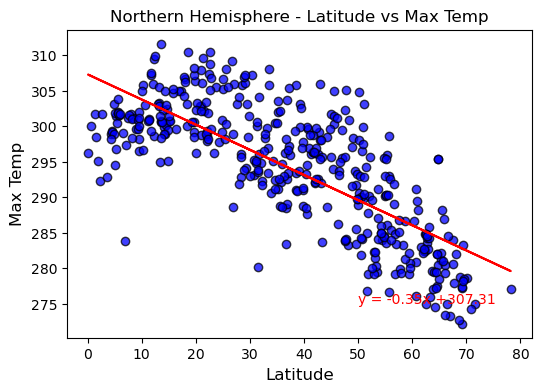

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern", (50,275))
plt.show()

The r-squared is: 0.7371924615272262
The correlation between both factors is 0.86


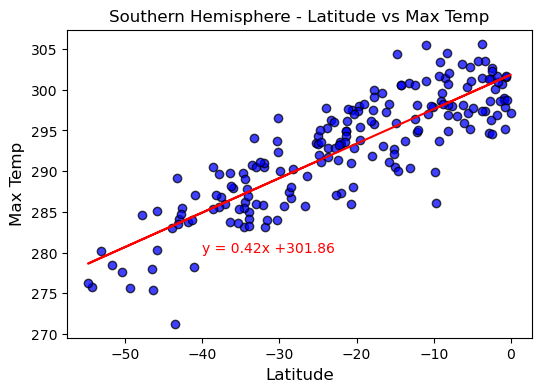

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (-40,280))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0027115164007215807
The correlation between both factors is 0.05


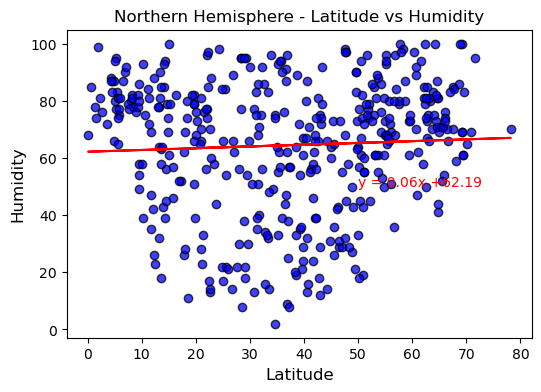

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern", (50,50))
plt.show()

The r-squared is: 0.004421076924508366
The correlation between both factors is 0.07


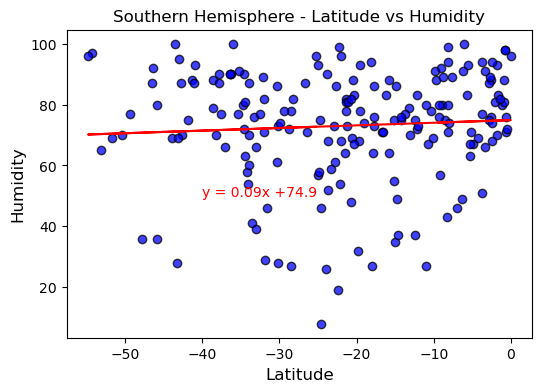

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern", (-40,50))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002266586590225045
The correlation between both factors is -0.05


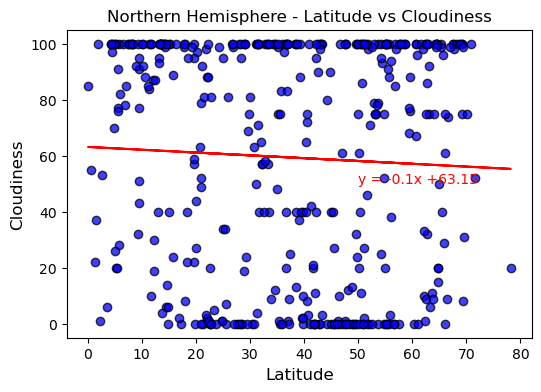

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (50,50))
plt.show()

The r-squared is: 0.009651550089707283
The correlation between both factors is 0.1


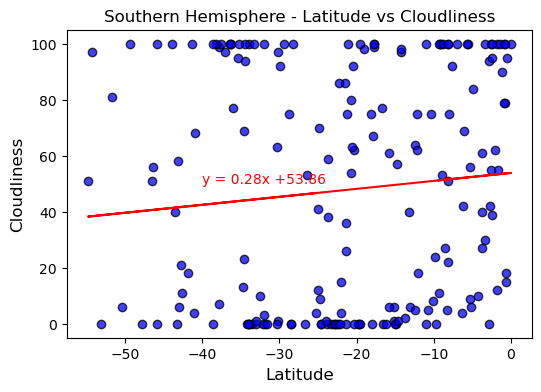

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudliness", "Southern", (-40,50))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013234788955659046
The correlation between both factors is -0.12


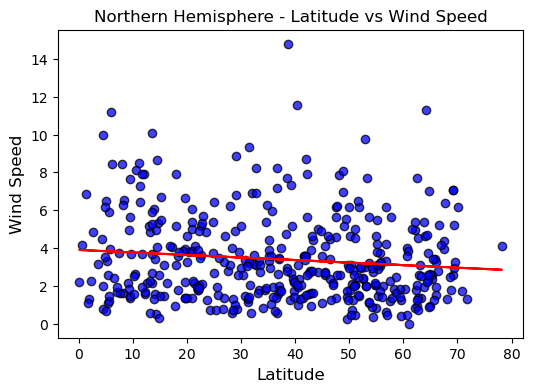

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (50,50))
plt.show()

The r-squared is: 0.04995593208104692
The correlation between both factors is -0.22


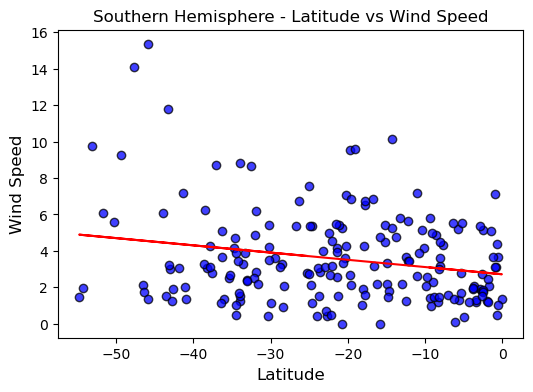

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-40,50))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [26]:
#Analysing the data
#From our first plot, we can see there is a positive relation between Latitude vs. Temperature. i.e. the nearer the equator, higher the temperature.
#On the other plots, comparing Latitude vs Humidity, Cloudiness and Wind Speed, it is not possible to say there is any co-relation, i.e. Humidity, Cloudiness and Wind Speed does not differ whether you are closer to the equator or further away.

#Looking at linear regression, the above hypothesis is re-instated. On both hemisphere, there is a positive linear regression between Latitude vs. Temperature. But there is no strong positive or negative linear regression between Latitude vs Humidity/Cloudiness or Wind Speed.
